# Machine Learning Model for Twitter Tweets to Identify Hate Speech

The dataset below includes Twitter tweets retrieved from two datasets posted on Kaggle and Github:

- Dataset 1 link: Kaggle [LINK TO INPUT].
- Dataset 2 link: GitHub [LINK TO INPUT].



We merge two datasets by initially converting one of them from a JSON file to CSV file. The other dataset was originally in a CSV format. We want to merge the two datasets to diversity the training data and make our model initially more exposed to similar data with tweets from different resources.

# Data Preprocessing 

## Data Preprocessing: Dataset #1

### Let's take a look at the training dataset, by looking at its first 5 entries, and the information on types of data it includes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


#### Note: label '1' denotes that the tweet contains hate speech, and label '0' denotes that the tweet does not contain hate speech. Let's look at the amount of hate and non-hate speech observations in the dataset.

In [4]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### As we can see, there are 29,720 non-hate speech tweets, and 2, 242 hate speech tweets.

#### Let's also check if there are any missing values of label in the dataset; we do so below by traversing through all the entries in the dataset.

In [5]:
for i in range(len(df)):
    if df['label'][i] != 0 and df['label'][i] != 1:
        print(df['label'][i])
    else:
        continue

#### There are no missing or invalid entries in the label column!

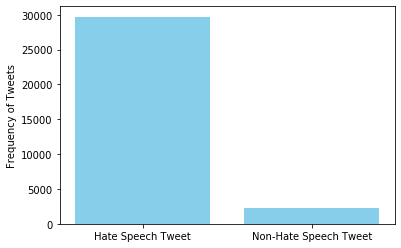

In [6]:
Sentiment_count = df.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

## Data Preprocessing: Dataset #2

#### We convert a JS file to CSV, and we modify the column names and labels (True/False Boolean to 0,1) to match the Dataset #1 and merge the two. This dataset will provide additional 678 entries>

In [7]:
df_extra = pd.read_csv('trainTweets.csv')

In [8]:
df_extra.head()

,classification,tweet
0,True,rt @_makada_ muslim refugee charged with beati...
1,True,rt @_makada_ muslim refugee charged with beati...
2,True,rt @johnkstahlusa there\'s something wrong wit...
3,True,trouble is it\'s all dem-friendly spending pl...
4,True,rt @amike4761 muslim refugees decline work say...


In [9]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 classification    678 non-null bool
tweet              678 non-null object
dtypes: bool(1), object(1)
memory usage: 6.1+ KB


#### Let's assign the ids to each tweet, and add it as an additional column.

In [10]:
ids = list(range(len(df)+1, len(df)+len(df_extra)+1))
df_extra.insert(0, 'id', ids)

In [11]:
df_extra = df_extra.rename(columns={'id':'id', ' classification':'label', 'tweet':'tweet'})

In [12]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 3 columns):
id       678 non-null int64
label    678 non-null bool
tweet    678 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 11.4+ KB


#### Let's check how many hate and non-hate speech entries we have.

In [13]:
df_extra.label.value_counts()

True     339
False    339
Name: label, dtype: int64

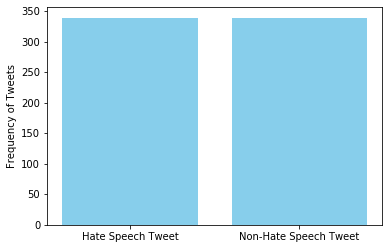

In [14]:
Sentiment_count = df_extra.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

#### There are 339 hate and 339 non-hate speech entries in this dataset. 
#### Let's change the boolean True/False label assignments to 1 and 0 respectively. 

In [15]:
df_extra["label"] = df_extra["label"].astype(int)

In [16]:
df_extra.head(1)

,id,label,tweet
0,31963,1,rt @_makada_ muslim refugee charged with beati...


#### Now we have the same 3 columns as in the other dataset - including id, label, and tweet.

## Merging two datasets:

In [17]:
data = df.append(df_extra, ignore_index=True, verify_integrity=False, sort=False)

In [18]:
data.label.value_counts()

0    30059
1     2581
Name: label, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640 entries, 0 to 32639
Data columns (total 3 columns):
id       32640 non-null int64
label    32640 non-null int64
tweet    32640 non-null object
dtypes: int64(2), object(1)
memory usage: 765.1+ KB


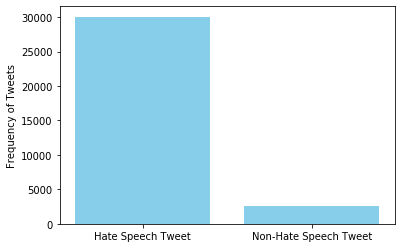

In [20]:
Sentiment_count = data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

## Exploratory Data Analysis

### Below we look at the 
- distributions of lengths of all tweets in total, hate-speech and non-hate speech tweets separately
- word frequencies using histograms and wordclouds

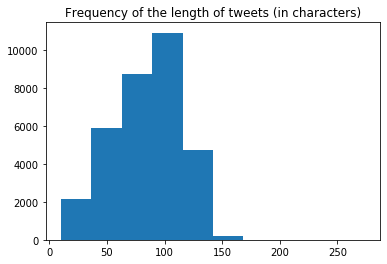

In [21]:
length_tweets = []
for i in range(len(data)):
    length_tweets.append(len(data.tweet[i]))

plt.hist(length_tweets)
plt.title("Frequency of the length of tweets (in characters)")
plt.show()

#### We cal split the dataset into non-hate speech and hate speech to look closer into them.

In [22]:
data_hate = data.loc[data.label==1]
data_no_hate = data.loc[data.label==0]

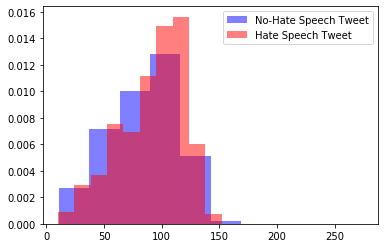

The mean of the length of hate speech tweets is: 91.62 characters
The median of the length of hate speech tweets is: 98.0 characters
---------------------------------------------------
The mean of the length of non-hate speech tweets is: 84.62 characters
The median of the length of non-hate speech tweets is: 88.0 characters


In [23]:
length_tweets_nh = []
length_tweets_h = []

for i in range(len(data_no_hate)):
    length_tweets_nh.append(len(data_no_hate.tweet.iloc[i]))

for i in range(len(data_hate)):
    length_tweets_h.append(len(data_hate.tweet.iloc[i]))

plt.hist(length_tweets_nh, density=True, alpha=0.5, color="blue") + plt.hist(length_tweets_h, density=True, alpha=0.5, color="red")
plt.legend(["No-Hate Speech Tweet", "Hate Speech Tweet"])
plt.show()

print("The mean of the length of hate speech tweets is:", round(np.mean(length_tweets_h), 2), "characters")
print("The median of the length of hate speech tweets is:", round(np.median(length_tweets_h), 2), "characters")
print("---------------------------------------------------")
print("The mean of the length of non-hate speech tweets is:", round(np.mean(length_tweets_nh), 2), "characters")
print("The median of the length of non-hate speech tweets is:", round(np.median(length_tweets_nh), 2), "characters")

#### We can note that there is no significant difference in between lengths of hate and non-hate tweets, as their distributions follow the same distribution pattern, majorly overlaying one another. Both mean and median of the first groups of tweets (hate speech) are higher that those of non-hate speech.

#### Let's tokenize all of the words in the tweek column.

In [24]:
import nltk
from nltk.tokenize import word_tokenize

data['tweet_token'] = data['tweet'].apply(lambda x: word_tokenize(x.lower()))

#### This is what the column of hate speech looks now:

In [25]:
data.loc[data.label==1, 'tweet_token']

13       [@, user, #, cnn, calls, #, michigan, middle, ...
14       [no, comment, !, in, #, australia, #, opkillin...
17                            [retweet, if, you, agree, !]
23       [@, user, @, user, lumpy, says, i, am, a, ., p...
34       [it, 's, unbelievable, that, in, the, 21st, ce...
                               ...                        
32296    [yeah, yeah, yeah, ., ., poor, you, ., ., ., y...
32297    [@, foxnews, @, love_the_donald, how, about, f...
32298                 [bitch, you, look, like, a, refugee]
32299    [this, is, not, the, idea, for, refugees, who,...
32300    [#, sanctuarycities, ethiopian, \'refugee\, ',...
Name: tweet_token, Length: 2581, dtype: object

#### We see that some entries are invalid (with special signs). Let's also remove all the ctopwords.

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [27]:
data['token_clean'] = data['tweet_token'].apply(lambda x: [w for w in x if w not in stop_words])
data.head()

,id,label,tweet,tweet_token,token_clean
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","[@, user, father, dysfunctional, selfish, drag..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, user, @, user, thanks, #, lyft, credit, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[#, model, love, u, take, u, time, urð±, !, ..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, #, motivation]"


In [28]:
import string

list_punctuation = []
for ch in string.punctuation:
    list_punctuation.append(ch)
    
print(list_punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


#### Let's also remove punctuation, by implementing a function that will store the entry it it is not in list of punctuation.

In [29]:
import string

data['token_cleaner'] = data['token_clean'].apply(lambda x: [w for w in x if w not in list_punctuation])
data['token_cleaner']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, n't, us...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_cleaner, Length: 32640, dtype: object

#### Let's remove the special characters outside punctuation.


In [30]:
import string
data['token_clean_alph'] = data['token_cleaner'].apply(lambda x: [i for i in x if i.isalpha()])
data['token_clean_alph']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, use, ca...
2                                        [bihday, majesty]
3                          [model, love, u, take, u, time]
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_clean_alph, Length: 32640, dtype: object

## Word frequencies 
#### Let's look into word frequencies of the general dataset and its 2 variations with hate and non-hate speech.

In [ ]:
from collections import Counter

## non-hate
token_counters1 = data.loc[data['label']==0, 'token_clean_alph'].apply(lambda x: Counter(x))
freq_tokens_nh = sum(token_counters1, Counter())

## hate-speech 
token_counters2 = data.loc[data['label']==1, 'token_clean_alph'].apply(lambda x: Counter(x))
freq_tokens_h = sum(token_counters2, Counter())

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(freq_tokens_h)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## convert dictionary into dataframe
data_items = freq_tokens.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df = df.rename(columns = {0:'word', 1:"frequency"})
df = df.sort_values(by=['frequency'], ascending=False)

df.head(30).plot.bar(x='word', y ='frequency')

#### Based on the observations above we want to delete the entries with - "user", "like", "via", and combine entries that include similar fonts.

#### Thus I create frequency lists of of the entire dataset and it split into hate and non-hate speech parts, mapping each word to the amount of times the word is used across the tweets.

In [ ]:
## Entire dictionary
frequency_dict = dict()

for each_tweet in range(len(data['token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict: 
            frequency_dict[word] += 1
        else: 
            frequency_dict[word] = 1        

In [ ]:
## non-hate dictionary
frequency_dict_nonhate = dict()

for each_tweet in range(len(data.loc[data['label']==0,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_nonhate: 
            frequency_dict_nonhate[word] += 1
        else: 
            frequency_dict_nonhate[word] = 1  

In [ ]:
## hate speech dictionary
frequency_dict_hate = dict()

for each_tweet in range(len(data.loc[data['label']==1,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_hate: 
            frequency_dict_hate[word] += 1
        else: 
            frequency_dict_hate[word] = 1        

### Let's create some wordclouds to see which words are most frequent in the dataset.

In [ ]:
## for all dataset
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## for non-hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_nonhate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## for hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_hate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Stemmatization

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

data['words_stemmed'] = data['token_clean_alph'].apply(lambda x: [ps.stem(i) for i in x])

In [ ]:
data['words_stemmed']

### Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#reference - https://www.davidsbatista.net/blog/2018/02/28/TfidfVectorizer/

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

In [ ]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

docs = data['words_stemmed']

tfidf.fit(docs)
tfidf.vocabulary_